# BBC News Articles

## Task 1: Exploratory Data Analytics
###### (a) Load the dataset and construct a feature vector for each article in the. You need to report the number of articles, and the number of extracted features. Show 5 example articles with their extracted features using a dataframe.
###### (b) Conduct term frequency analysis and report three plots: (i) top-50 term frequency distribution across the entire dataset, (ii) term frequency distribution for respective class of articles, and (iii) class distribution.

Setup

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import random

Import Data

In [66]:
df = pd.read_csv("train.csv", skiprows=0, header=0, na_values= "", dtype=str)
df.head()

## Load Test Data ##
testdf = pd.read_csv("test.csv", skiprows=0, header=0, na_values= "", dtype=str)
testdf.head()

,ArticleId,Text,Category
0,1821,johnny denise lose passport johnny vaughan den...,entertainment
1,522,bt offers free net phone calls bt offering cus...,tech
2,636,power people says hp digital revolution focuse...,tech
3,170,stars gear bafta ceremony film stars across gl...,entertainment
4,85,controversial film tops festival controversial...,entertainment


Vectorize Data

In [37]:
articles_text = df["Text"].to_numpy()

#select 5 random articles for task 1
random_sample = random.sample(list(articles_text), 5)

## APPROACH ONE ##
vectorizer1 = CountVectorizer()
vectorizer1.fit(articles_text)

vectorizer1_sample = CountVectorizer()
vectorizer1_sample.fit(random_sample)

#Summary
#print(f'vector vocabulary - {vectorizer.vocabulary_}\n')

# encode document
vector1 = vectorizer1.transform(articles_text)
vector1_sample = vectorizer1_sample.transform(random_sample)

# summarize encoded vector
print("Method 1")
print(f'article vector\n {vector1.toarray()}')
print(f'\narticle vector (5 articles)\n {vector1_sample.toarray()}')

## APPROACH TWO ##
vectorizer2 = TfidfVectorizer()
vectorizer2.fit(articles_text)

vectorizer2_sample = TfidfVectorizer()
vectorizer2_sample.fit(random_sample)

#Summary
#print(f'vector vocabulary - {vectorizer2.vocabulary_}\n')

# encode document
vector2 = vectorizer2.fit_transform(articles_text)
vector2_sample = vectorizer2_sample.transform(random_sample)

# summarize encoded vector
print('\n', "Method 2")
print(f'article vector\n {vector2.toarray()}')
print(f'\narticle vector (5 articles)\n {vector2_sample.toarray()}')
print('\nArticles:', vector2.shape[0], ', Extracted Features:', vector2.shape[1])

# for my task
## APPROACH ONE ##
vectorizer1 = CountVectorizer()
vectorizer1.fit(articles_text)

vectorizer1_sample = CountVectorizer()
vectorizer1_sample.fit(random_sample)

# encode document
vector1 = vectorizer1.transform(articles_text)
vector1 = vector1.toarray()
v1_names = vectorizer1.get_feature_names_out()

vector1_sample = vectorizer1_sample.transform(random_sample)
vector1_sample = vector1_sample.toarray()
v1_sample_names = vectorizer1_sample.get_feature_names_out()

#map sample to feature names
v1_sample_df = pd.DataFrame(data=zip(v1_sample_names, vector1_sample[0], vector1_sample[1], vector1_sample[2], vector1_sample[3], vector1_sample[4], sum([vector1_sample[0], vector1_sample[1], vector1_sample[2], vector1_sample[3], vector1_sample[4]])), columns=['Features', 'Article 1', 'Article 2', 'Article 3', 'Article 4', 'Article 5', 'Total'])

v1_df_emily = pd.DataFrame(data=vector1, columns = v1_names)

Method 1
article vector
 [[0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

article vector (5 articles)
 [[0 0 0 ... 0 0 0]
 [0 0 1 ... 1 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [1 0 0 ... 0 0 1]]

 Method 2
article vector
 [[0.         0.02011467 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]

article vector (5 articles)
 [[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.08140554 ... 0.08140554 0.         0.        ]
 [0.         0.059516   0.         ... 0.         0.         0.        ]
 [0.     

## Task 2: Classification Models Learning

### Logistic Regression
###### Train your logistic regression classifier with L2-regularization. Consider different values of the regularization term λ. Describe the effect of the regularization parameter λ on the outcome in terms of bias and variance. Report the plot generated for specific λ values with training loss on the y-axis versus λ on the x-axis to support your claim.

In [110]:
# Matthew Young
# Logistic Regression Classifier

# Import Libraries for LR, metrics, and graph plotting
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import log_loss
from matplotlib import pyplot as plt

traindf = df
text_transformer = TfidfVectorizer()
X_train_text = text_transformer.fit_transform(traindf['Text'])
X_test_text = text_transformer.transform(testdf['Text'])

y = traindf['Category']  #Target Variable of Category being Tech or Entertainment

## L2 Regularization LR Classifer
logreg = LogisticRegression(penalty='l2', solver='lbfgs', C=1, multi_class='multinomial')
logreg.fit(X_train_text, y)

logreg_prediction = logreg.predict(X_test_text)
logreg_prediction_prob = logreg.predict_proba(X_test_text)

# Logistic Regression Summary
logreg_predict_df = pd.DataFrame(data=logreg_prediction, columns=['Prediction'])
logreg_prediction_prob_df = pd.DataFrame(data=logreg_prediction_prob, columns=['Entertainment', 'Tech'])
logreg_score = logreg.score(X_test_text, testdf['Category'])

print('\n', "Logistic Regression Predictions")
print(logreg_predict_df)
print('\n', "Logistic Regression Prediction Probabilities")
print(logreg_prediction_prob_df)
print('\n', "Logistic Regression Accuracy")
print(logreg_score)



 Logistic Regression Predictions
        Prediction
0    entertainment
1             tech
2             tech
3    entertainment
4    entertainment
..             ...
101  entertainment
102  entertainment
103  entertainment
104           tech
105           tech

[106 rows x 1 columns]

 Logistic Regression Prediction Probabilities
     Entertainment      Tech
0         0.658963  0.341037
1         0.112167  0.887833
2         0.154608  0.845392
3         0.941835  0.058165
4         0.943972  0.056028
..             ...       ...
101       0.597341  0.402659
102       0.792064  0.207936
103       0.816202  0.183798
104       0.137007  0.862993
105       0.157883  0.842117

[106 rows x 2 columns]

 Logistic Regression Accuracy
0.9905660377358491


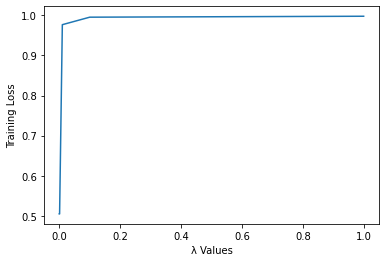

In [124]:
# LR Plot
# X-Axis: Lambda
# Y-Axis: Training/Log Loss

lambda_values = [0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1]
training_loss = []
for _lambda in lambda_values:
    logreg = LogisticRegression(penalty='l2', solver='lbfgs', C=_lambda, multi_class='multinomial')
    logreg.fit(X_train_text, y)
    training_loss.append(logreg.score(X_train_text, y))

plt.plot(lambda_values, training_loss)
plt.xlabel('λ Values')
plt.ylabel('Training Loss')
plt.show()


Regularization is the technique used to reduce error by fitting a function appropriately on the given training set and avoid under/overfitting.

The effect of the regularization parameter λ on the outcome in terms of bias and variance is that as the lambda parameter increases, training error increases. Regularization forces parameters to be close to 0 which causes the variance to decrease, but as we are allowing less flexibility, the model moves away from the true values, thus increasing bias.

### Naive Bayes
###### Train a Naive Bayes classifier using all articles features. Report the (i) top-20 most identifiable words that are most likely to occur in the articles over two classes using your NB classifier, and (ii) the top-20 words that maximize the following quantity 𝑃(𝑋𝑤=1|𝑌=𝑦)/𝑃(𝑋𝑤=1|𝑌≠𝑦). Which list of words describe the two classes better? Briefly explain your reasoning. - She's going to change some stuff and make an announcement


In [5]:
# Emily

from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

# X_train is vectorised features, Y_train is the classes of each row / target variable
X_train = vector2.toarray()
target_col = df["Category"]
Y_train = target_col.to_numpy()

NB_clf = MultinomialNB()
NB_clf.fit(X_train, Y_train)

# Training accuracy
y_train_pred = NB_clf.predict(X_train)
train_acc = metrics.accuracy_score(Y_train, y_train_pred)
# or
train_acc_2 = NB_clf.score(X_train, Y_train)

print(train_acc, "or", train_acc_2)

# Testing accuracy
#Y_pred = NB_clf.predict(X_test)
#print("Test Accuracy:",metrics.accuracy_score(Y_Test, Y_pred))





0.9953271028037384 or 0.9953271028037384


### (i)

In [81]:
# Df for grouping - vectorsied df with target df 
count_df = pd.concat([v1_df_emily,target_col], axis=1)

# Grouped data by category
grouped = count_df.groupby(count_df.Category)

# Split data into df of each category
# dropped category column for sum
tech_df = grouped.get_group("tech")
tech_df = tech_df.drop("Category", axis=1)

ent_df = grouped.get_group("entertainment")
ent_df = ent_df.drop("Category", axis=1)

# Summed each colum in each df
sum_tech_series = tech_df.sum()
sum_ent_series = ent_df.sum()

# Sorting each series to get top 20
sorted_tech = sum_tech_series.sort_values(ascending = False)
top_20_tech = sorted_tech[:20]
print("Top 20 Tech:")
print(top_20_tech)

sorted_ent = sum_ent_series.sort_values(ascending = False)
top_20_ent = sorted_ent[:20]
print("Top 20 Entertainment:")
print(top_20_ent)

Top 20 Tech:
said          892
people        507
new           304
mobile        290
mr            288
one           286
also          273
would         267
could         255
technology    247
use           228
users         214
net           214
software      213
games         212
us            210
music         203
many          202
year          201
phone         196
dtype: int64
Top 20 Entertainment:
said      465
film      420
best      324
year      241
music     210
also      206
us        201
new       196
one       193
show      180
first     155
awards    137
tv        130
last      127
uk        127
actor     126
number    124
band      123
mr        120
star      118
dtype: int64


### (ii)

In [83]:
total_tech = tech_df.shape[0]
prob_word_given_tech = sum_tech_series / total_tech

total_ent = ent_df.shape[0]
prob_word_given_ent = sum_ent_series / total_ent

# prob of word in tech / prob of word not in tech - with smoothing
tech_series = (prob_word_given_tech + 1) / (prob_word_given_ent + 2)

# prob of word in entertainment / prob of word not in entertainment - with smoothing
ent_series = (prob_word_given_ent + 1) / (prob_word_given_tech + 2)

# Sorting each series to get top 20
sorted_tech2 = tech_series.sort_values(ascending = False)
top_20_tech2 = sorted_tech2[:20]
print("Top 20 Tech:")
print(top_20_tech2)

sorted_ent2 = ent_series.sort_values(ascending = False)
top_20_ent2 = sorted_ent2[:20]
print("Top 20 Entertainment:")
print(top_20_ent2)


Top 20 Tech:
people        1.341420
said          1.223264
mobile        1.168540
technology    1.064229
use           0.997203
users         0.995370
software      0.993056
net           0.990697
games         0.981481
phone         0.944791
could         0.941503
mr            0.909314
computer      0.894544
would         0.892760
digital       0.871711
microsoft     0.856481
many          0.852930
service       0.843495
online        0.838679
internet      0.833805
dtype: float64
Top 20 Entertainment:
film        1.358491
best        1.164420
awards      0.793716
actor       0.791672
band        0.788270
show        0.763664
star        0.758976
award       0.756608
album       0.729444
year        0.729142
actress     0.712264
singer      0.709906
chart       0.708266
oscar       0.705189
british     0.695703
director    0.694975
films       0.684314
music       0.677106
stars       0.676887
musical     0.666725
dtype: float64


Difference - there is a difference just by looking at them, the top20 words from (ii) look to be more relevent than the top20 words from (i). So (ii) seems to be the better formula.



### NTS - What I need to do
Cut the data df into the two classes
add up word count for each column 
pick ones with the top counts

count of the class i'm looking at / count of class i'm not looking at

df.sum() - give array 
arc sort 

### Soft Value Margin (SVM)
###### Train your SVM classification models on the training dataset. You need to report two surface plots for: (i) the soft-margin linear SVM with your choice of misclassification penalty (𝐶), and (ii) the hard-margin RBF kernel with your choice of kernel width (σ). Explain the impact of penalty 𝐶 on the soft-margin decision boundaries, as well as the kernel hyperparameter on the hard-margin decision boundaries.

In [ ]:
# Humza

### Nearest Neighbor
###### Consider the neural network with the following hyperparameters: the initial weights uniformly drawn in range [0,0.1] with learning rate 0.01.
######  ● Train a single hidden layer neural network using the hyperparameters on the training dataset, except for the number of hidden units (x) which should vary among 5, 20, and 40. Run the optimization for 100 epochs each time. Namely, the input layer consists of n features x = [x1, ..., xn]T , the hidden layer has x nodes z = [z1, ..., zx]T , and the output layer is a probability distribution y = [y1, y2]T over two classes.
######  ● Plot the average training cross-entropy loss as shown below on the y-axis versus the number of hidden units on the x-axis. Explain the effect of numbers of hidden units. 𝐶𝑟𝑜𝑠𝑠𝐸𝑛𝑡𝑟𝑜𝑝𝑦𝐿𝑜𝑠𝑠 =− 𝑖=1 2 Σ 𝑦𝑖 log(𝑦𝑖 ^ )